<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/bsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solving the Black-Scholes-Merton Formula by FDM**

* **FDM** stands for **Finite Difference Method**.
* Thanks to
[Antoni Smolski](https://antonismolski.medium.com/?source=post_page-----965fd0539808--------------------------------)
for his inspiring BSM blog  
https://antonismolski.medium.com/implementation-of-black-scholes-formula-using-finite-difference-method-with-code-965fd0539808  
on which this notebook is based.

* The code in this notebook is largely Antoni's code with
  needed modifications to suite our course needs and targets.

* The Black-Scholes-Merton is the partial differential equation  
  $\quad\Large
  v_t +rsv_s + \frac{1}{2}\sigma^2 s^2 v_{ss} = r v
  $

* $v(s,t)$ is the option value of a given asset at
   price $s$,  at time $t$.

* $r$ = risk-free interest rate

* $\sigma$ = the volatility of the stock (standard deviation)

* We use Python's [Numpy package](https://numpy.org), to model
  the **FDM** grid structure which represents the discrete
  version of $v(s,t)$.

* We use our **fdmtools** Python package,
  which is installed and imported by the next code cell.

In [1]:
%pip install -q https://samyzaf.com/fdmtools-3.zip
from fdmtools.bsm import *

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


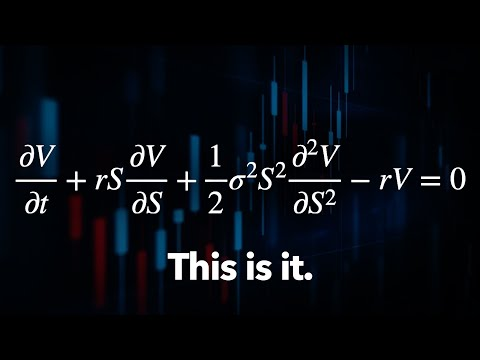

In [2]:
#@title Black-Scholes-Merton Equation Video
#@markdown  Motivation Video
YouTubeVideo("A5w-dEgIU1M", width=640, height=360)

* The implementation is the straightforward modification of
  Antoni Smolski code.

* I highly recommend reading his Blog!  
  https://antonismolski.medium.com/implementation-of-black-scholes-formula-using-finite-difference-method-with-code-965fd0539808  

* Another useful source:  
https://diter.medium.com/option-pricing-using-the-black-scholes-model-without-the-formula-e09235f75fb7

In [3]:
# sigma = the volatility of the stock (standard deviation)
#       = the degree of variation of a trading price series over time
# r = risk-free interest rate
# K = Strike price
# Ns = Number of asset price steps
# Nt = Number of time steps (Nt=0 means choose optimal number)

def Solve(sigma, r, K, T, Ns, Nt=0):
    Price = np.zeros(Ns + 1)            # Ns = Number of Asset steps array
    S = 3*K                             # Max asset price
    ds = S/Ns                           # asset price step
    if Nt==0:                           # Automatic optimal selection of time step
        dt = 0.9 / (sigma**2 * Ns**2)   # Stable optimal value of dt
        Nt = int(T/dt) + 1              # Number of time steps
    dt = T / Nt                         # Ensure that T is an integer number of time steps away
    V = np.zeros((Ns+1, Nt+1))          # Option Value Array (V FDM grid)

    for i in range(Ns+1):
        Price[i] = i*ds
        V[i,0] = max(Price[i] - K, 0)   # Initial condition at time t=0

    for k in range(1, Nt+1):  # Time loop
        # And now ta dam ... Nobel prize winning diff equation ;)
        for i in range(1, Ns):  # Asset loop
            delta = (V[i+1,k-1] - V[i-1,k-1]) / (2*ds)                 # Vs[i,k] as central difference
            gamma = (V[i+1,k-1] - 2*V[i,k-1] + V[i-1,k-1]) / (ds**2)   # Vss[i,k] as central difference
            theta = -0.5 * sigma**2 * Price[i]**2 * gamma - r*Price[i]*delta + r*V[i,k-1]
            V[i, k] = V[i, k - 1] - dt * theta

        V[0,k] = 0                     # Boundary condition at s=0
        V[Ns,k] = S - K*exp(-r*k*dt)   # Boundary condition at s=S (Smax)

    asset_steps = ds * np.arange(0, Ns + 1)   # Asset price steps from 0 to S (i*ds, i=0,1,..,Ns)
    time_steps = dt * np.arange(0, Nt + 1)    # Time steps from 0 to T (k*dt, k=0,1,..,Nt)
    rounded_asset_steps = np.round(asset_steps, decimals=3)
    rounded_time_steps = np.round(time_steps, decimals=4)
    #data = pd.DataFrame(V, index=asset_range, columns=rounded_time_steps).round(3)
    data = pd.DataFrame(np.transpose(V), index=rounded_time_steps, columns=rounded_asset_steps).round(3)
    data.attrs = dict(S=S, T=T, K=K, ds=ds, dt=dt, r=r, sigma=sigma, Ns=Ns, Nt=Nt)

    return data  # Output array as pandas data frame object





# A Simple Example
* In the following example we solve the BSM equation for a stock option
  with the following parameters.

In [4]:
K = 50            # Option strike price
S = 3*K           # Maximum asset price
T = 3             # Maximum time (in year units)
Ns = 100          # number of asset price steps
Nt = 0            # Let Solve choose an optimal number of time steps
sigma = 0.4       # Asset price sensitivity (aka volatility)
r = 0.05          # Interest rate

data = Solve(sigma, r, K, T, Ns, Nt)

* **data** is a [Pandas](https://pandas.pydata.org/)
  [DataFrame object](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
  which holds the FDM grid solution in a tabular form.
  This is a very useful info container which is easy to
  query.

* Here are the the first 5 rows of this table followed
  by the last 5 rows.
  
* The columns are asset price steps,
  and the lines are time steps.

In [5]:
data

,0.0,1.5,3.0,4.5,6.0,7.5,9.0,10.5,12.0,13.5,...,136.5,138.0,139.5,141.0,142.5,144.0,145.5,147.0,148.5,150.0
0.0000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,86.500,88.000,89.500,91.000,92.500,94.000,95.500,97.000,98.500,100.000
0.0006,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,86.501,88.001,89.501,91.001,92.501,94.001,95.501,97.001,98.501,100.001
0.0011,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,86.503,88.003,89.503,91.003,92.503,94.003,95.503,97.003,98.503,100.003
0.0017,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,86.504,88.004,89.504,91.004,92.504,94.004,95.504,97.004,98.504,100.004
0.0022,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,86.506,88.006,89.506,91.006,92.506,94.006,95.506,97.006,98.506,100.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.9978,0.0,0.0,0.0,0.002,0.007,0.023,0.054,0.108,0.192,0.311,...,93.930,95.376,96.822,98.269,99.716,101.164,102.612,104.061,105.510,106.960
2.9983,0.0,0.0,0.0,0.002,0.007,0.023,0.054,0.109,0.192,0.311,...,93.931,95.377,96.823,98.270,99.717,101.165,102.614,104.062,105.511,106.961
2.9989,0.0,0.0,0.0,0.002,0.007,0.023,0.054,0.109,0.192,0.311,...,93.933,95.378,96.824,98.271,99.719,101.166,102.615,104.064,105.513,106.962
2.9994,0.0,0.0,0.0,0.002,0.007,0.023,0.054,0.109,0.193,0.312,...,93.934,95.380,96.826,98.273,99.720,101.168,102.616,104.065,105.514,106.963


* On the right side of this table you will find three
  buttons for interacting with it just as if it was
  an Excel table.
  * The first button displays a full interactive table.
  * The second buttons dispaly several charts, and
    can create code for generating them
  * The third button is experimental AI code generator for
     extracting information from this table.

* To learn more on how you can interact with the **data** object
  read the
  [Pandas package reference guide](https://pandas.pydata.org/docs/user_guide/index.html)

* For example, to print the table index (time steps),
  use the command:

In [7]:
times = data.index
print(times)

Index([   0.0, 0.0006, 0.0011, 0.0017, 0.0022, 0.0028, 0.0034, 0.0039, 0.0045,
       0.0051,
       ...
       2.9949, 2.9955, 2.9961, 2.9966, 2.9972, 2.9978, 2.9983, 2.9989, 2.9994,
          3.0],
      dtype='float64', length=5335)


* This is a list of 5335 time steps that are required for
  precision.
  
* To see the table columns (asset price steps),
  use the following command:

In [8]:
prices = data.columns
print(prices)

Index([  0.0,   1.5,   3.0,   4.5,   6.0,   7.5,   9.0,  10.5,  12.0,  13.5,
       ...
       136.5, 138.0, 139.5, 141.0, 142.5, 144.0, 145.5, 147.0, 148.5, 150.0],
      dtype='float64', length=101)


* This is a list of 100 price steps with **ds=1.5**.
* A Pandas DataFrame can be also exporetd into a Microsoft Excel sheet easily!
* If you are a Microsoft Excel user, you may want to convert
  it to an Excel sheet, and then interact with it using
  Microsoft office analysis tools.

In [ ]:
data.to_excel("data.xlsx")

* The resulting Excel file can be viewed
  [from this link](https://samyzaf.com/fdm/data.xlsx)

* But you can download this Excel sheet from here to your
  local disk by the following command.

In [ ]:
file_download("data.xlsx")

* These are only 3 methods from 427 methods that you can
  apply on a **DataFrame** object.

* To learn and try more of them check out the
  [DataFrame reference guide](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

# BSM Heatmap
* The method **bsm_heatmap** can be used for drawing
  a heatmap of the tabular **data**.

* This method is part of our
  [**fdmtools package**](https://samyzaf.com/fdmtools-3.zip)
  and can be viewed by downloading this package.

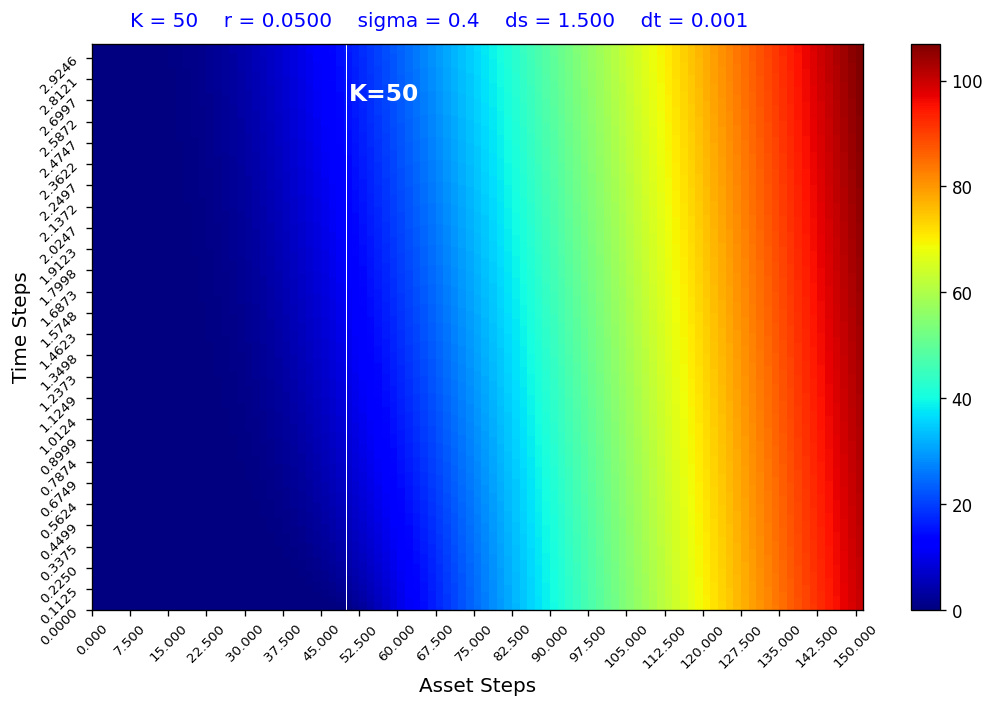

In [9]:
bsm_heatmap(data)


# BSM 3D surface representation
* There are more visualization aids available in Python's
  matplotlib package.

* Here is a 3D surface which represents **V**.

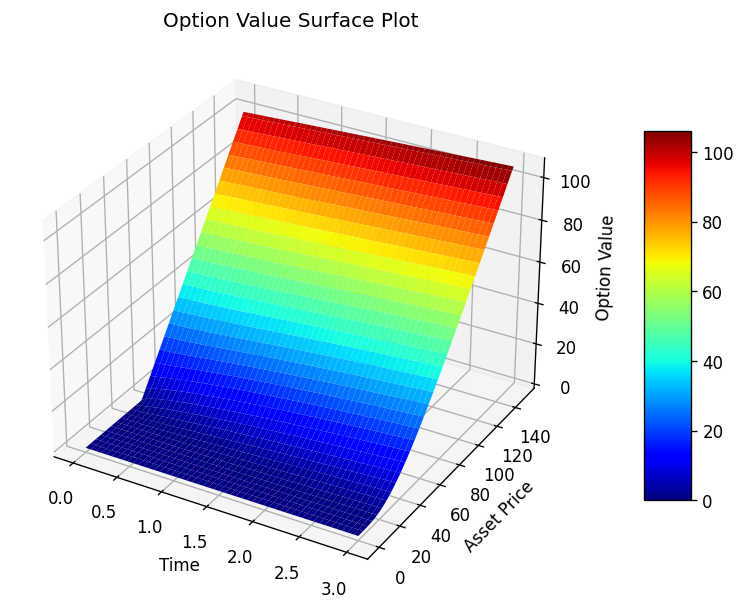

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
Y,X = np.meshgrid(data.columns, data.index)
Z = data.values
surf = ax.plot_surface(X, Y, Z, cmap="jet")
ax.set_xlabel('Time')
ax.set_ylabel('Asset Price')
ax.set_zlabel('Option Value')
ax.set_title('Option Value Surface Plot')
fig.colorbar(surf, shrink=0.5, aspect=8, pad=0.1)
plt.show()

# Extracting local and precision information
* The **data** object is quite large: 855 rows × 41 columns.
  That is 35055 entries!

* The heatmap and 3D surface plots are great **infographics**
  tools, but are not adequate for obtaining precise values
  for specific needs.

* In most cases we would like to inspect a small
  subset of information
  around specific values such as our strike price **K** and
  maturation time **t**.

* For example, if our strike price is **K=50** and maturation
  time is **t=2** (2 years), here is a small code snippet
  for extracting a small table around these values:

In [13]:
s = 50  # Strike price
t = 2   # Maturation time (2 years)
ds = data.attrs["ds"]
dt = data.attrs["dt"]
i = int(s/ds)
k = int(t/dt)
print(f"Extracting a small sub-table (10x10) around price s={s} and time t={t}")
df = data.iloc[k-5:k+5, i-5:i+5]
df

Extracting a small sub-table (10x10) around price s=50 and time t=2


,42.0,43.5,45.0,46.5,48.0,49.5,51.0,52.5,54.0,55.5
1.9966,8.164,9.023,9.917,10.845,11.805,12.796,13.816,14.864,15.938,17.036
1.9972,8.166,9.024,9.919,10.847,11.807,12.798,13.818,14.866,15.940,17.038
1.9978,8.168,9.026,9.920,10.849,11.809,12.800,13.820,14.868,15.942,17.040
1.9983,8.170,9.028,9.922,10.850,11.811,12.802,13.822,14.870,15.944,17.042
1.9989,8.171,9.030,9.924,10.852,11.813,12.804,13.824,14.872,15.946,17.045
1.9994,8.173,9.032,9.926,10.854,11.815,12.806,13.826,14.874,15.948,17.047
2.0000,8.175,9.034,9.928,10.856,11.817,12.808,13.828,14.876,15.950,17.049
2.0006,8.177,9.035,9.930,10.858,11.819,12.810,13.831,14.878,15.952,17.051
2.0011,8.178,9.037,9.932,10.860,11.821,12.812,13.833,14.880,15.954,17.053
2.0017,8.180,9.039,9.933,10.862,11.823,12.814,13.835,14.883,15.957,17.055


* Notice the **Next steps** suggestions at the bottom of
  the table which offers you code for generating plots.
  You can learn more by playing with it.
  
* The **data** object has a special attributes
  dictionary **data.attrs**
  which holds all the parameters: **S, K, T, ds, dt, ...**
  * To access the time step **dt** use:
    **dt = data.attrs["dt"]**.
  * To access the number of price steps **Ns** use:
    **Ns = data.attrs["Ns"]**.
  * Etc ...

* Like in Microsoft Excel, to access **data** we need integer
  indices **i**, **k**.
  Beware that **k** is a row index, and **i** is a column index!

* Therefore we had to convert the price value **s=50**
  to its corresponding column index **i=s/ds**,
  and the time value **t=2.0** to its corresponding
  row index **k=t/dt**.

* To access 10 rows around **i** we use a range expression
  **i-5:i+5**.

* But the first thing we should have noticed is that
  our desired price **s=50** and time **t=2**
  are **not** in this table!

* This is a typical issue with discrete models, which is
  confronted by a special interpolation procedure for
  computing the in between values.

* Our **fdmtools** package includes an **interpolate** method
  for handling this issue

In [15]:
s = 50.0
t = 2.0
v = interpolate(data, s, t)
print(v)

13.148


* So the value of a **CALL option** with price **s=50** for **t=2** years with
  a strike price **s=50** is **v=13.148**

* We may want to compare it against values with different strike
  prices 45-55.

* We can also reconsider our maturation time to be **t=1.0**.
  We have a method for generating a local table around
  **s=50, t=1.0**.

* For that purpose we need a more general method for generating
  small subsets of our large table.
  For example, to generate a smaller table for price range 40-60
  and time range 0.98-1.02, we can use the following code:

In [16]:
times = [t for t in data.index if 0.98<=t<=1.02]
prices = [s for s in data.columns if 40<=s<=60]
df = data.loc[times,prices]
df

,40.5,42.0,43.5,45.0,46.5,48.0,49.5,51.0,52.5,54.0,55.5,57.0,58.5,60.0
0.9803,3.920,4.573,5.278,6.036,6.845,7.701,8.604,9.550,10.538,11.565,12.629,13.727,14.858,16.018
0.9809,3.922,4.575,5.281,6.039,6.847,7.704,8.607,9.553,10.541,11.568,12.632,13.730,14.861,16.021
0.9814,3.925,4.577,5.283,6.042,6.850,7.707,8.609,9.556,10.544,11.571,12.635,13.733,14.863,16.024
0.9820,3.927,4.579,5.286,6.044,6.853,7.709,8.612,9.559,10.547,11.574,12.638,13.736,14.866,16.027
0.9826,3.929,4.582,5.288,6.047,6.855,7.712,8.615,9.562,10.550,11.577,12.641,13.739,14.869,16.029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.0174,4.062,4.723,5.437,6.202,7.016,7.878,8.785,9.735,10.725,11.754,12.818,13.917,15.047,16.206
1.0180,4.064,4.725,5.439,6.205,7.019,7.881,8.788,9.737,10.728,11.756,12.821,13.920,15.050,16.209
1.0186,4.066,4.728,5.442,6.207,7.022,7.883,8.790,9.740,10.731,11.759,12.824,13.923,15.053,16.212
1.0191,4.068,4.730,5.444,6.210,7.024,7.886,8.793,9.743,10.733,11.762,12.827,13.925,15.055,16.215


* This is still a long table (71 rows, 15 colums).
* We can use our heatmap or 3d surface tools to get
  a visual impression of it.

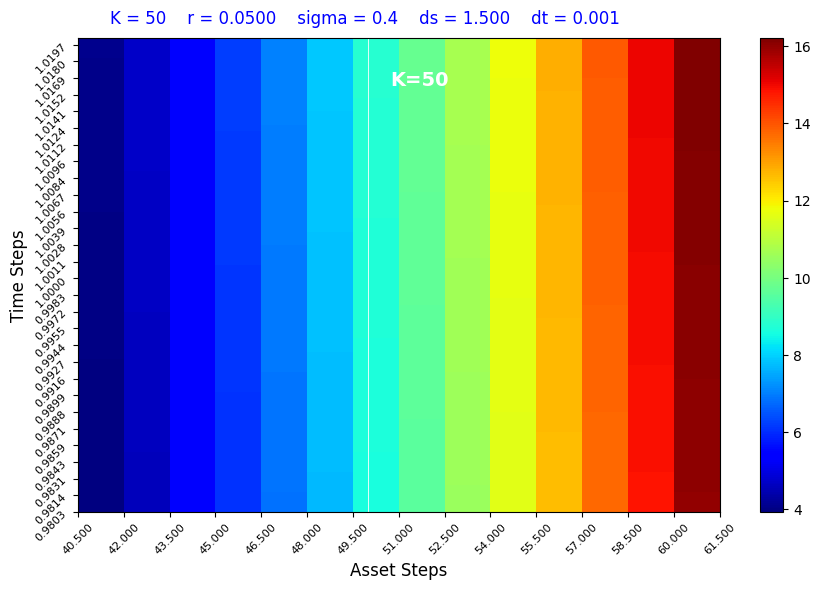

In [18]:
bsm_heatmap(df)

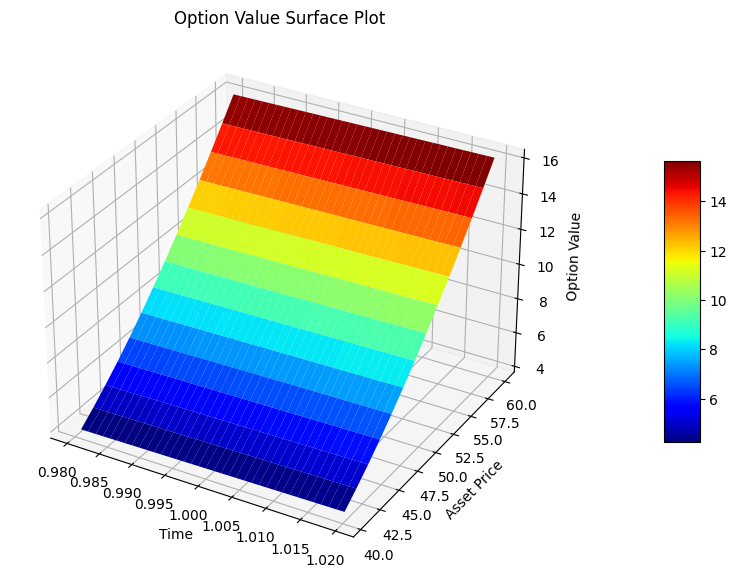

In [19]:
bsm_surface(df)